# NAME : İlker Efil

The goal is to predict the price value of the Airbnb listings in Amsterdam using the provided dataset (data.csv).

# Importing Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Exploratory Data Analysis (EDA)

In [2]:
# Loading the data from the CSV file
data = pd.read_csv('data.csv')

In [3]:
# Displaying the dimensions of the dataset
print("Dataset Dimensions: ", data.shape)

Dataset Dimensions:  (8739, 23)


In [4]:
data.head()

,id,host_id,host_name,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_verifications,neighbourhood_cleansed,property_type,...,beds,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,9060873,47265643,Magali,NaN,NaN,NaN,86%,"['email', 'phone']",Oud-Oost,Entire condo,...,1.0,$232.00,5,4.60,4.60,4.40,4.40,4.60,4.60,4.40
1,1427610,7677579,Aukje,Hi! I am Aukje. I live with my husband and two...,NaN,NaN,50%,"['email', 'phone']",Geuzenveld - Slotermeer,Entire home,...,2.0,$120.00,6,5.00,4.67,4.83,4.83,5.00,4.67,4.83
2,4829273,15049236,Franz,I've been told to be a friendly and social per...,within a few hours,100%,83%,"['email', 'phone', 'work_email']",Oostelijk Havengebied - Indische Buurt,Entire rental unit,...,2.0,$170.00,51,4.71,4.80,4.65,4.87,4.96,4.57,4.57
3,3237893,16382847,Vieve,NaN,within a day,70%,18%,"['email', 'phone']",De Pijp - Rivierenbuurt,Entire rental unit,...,NaN,$200.00,43,4.86,4.95,4.93,4.95,4.98,5.00,4.84
4,864176551965684805,508937163,Saeed,NaN,a few days or more,0%,60%,"['email', 'phone']",Oostelijk Havengebied - Indische Buurt,Entire home,...,2.0,$265.00,5,5.00,5.00,5.00,5.00,5.00,5.00,4.40


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8739 entries, 0 to 8738
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           8739 non-null   int64  
 1   host_id                      8739 non-null   int64  
 2   host_name                    8739 non-null   object 
 3   host_about                   4707 non-null   object 
 4   host_response_time           5679 non-null   object 
 5   host_response_rate           5679 non-null   object 
 6   host_acceptance_rate         7377 non-null   object 
 7   host_verifications           8739 non-null   object 
 8   neighbourhood_cleansed       8739 non-null   object 
 9   property_type                8739 non-null   object 
 10  room_type                    8739 non-null   object 
 11  accommodates                 8739 non-null   int64  
 12  bathrooms_text               8730 non-null   object 
 13  beds              

In [6]:
# Dropping unnececary columns
data.drop(
    columns=['id', 'host_id', 'host_name', 'host_about', 
    'host_response_time', 'host_response_rate', 
    'host_acceptance_rate', 'host_verifications'
            ], inplace=True)

In [7]:
data.head()

,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms_text,beds,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,Oud-Oost,Entire condo,Entire home/apt,2,1 bath,1.0,$232.00,5,4.60,4.60,4.40,4.40,4.60,4.60,4.40
1,Geuzenveld - Slotermeer,Entire home,Entire home/apt,4,2 baths,2.0,$120.00,6,5.00,4.67,4.83,4.83,5.00,4.67,4.83
2,Oostelijk Havengebied - Indische Buurt,Entire rental unit,Entire home/apt,4,1 bath,2.0,$170.00,51,4.71,4.80,4.65,4.87,4.96,4.57,4.57
3,De Pijp - Rivierenbuurt,Entire rental unit,Entire home/apt,2,1.5 baths,NaN,$200.00,43,4.86,4.95,4.93,4.95,4.98,5.00,4.84
4,Oostelijk Havengebied - Indische Buurt,Entire home,Entire home/apt,3,1.5 baths,2.0,$265.00,5,5.00,5.00,5.00,5.00,5.00,5.00,4.40


In [8]:
# Deleting dollar mark
data['price'] = data['price'].replace('[\$,]', '', regex=True).astype(float)

In [9]:
# Removing 'bath' and 'baths' and convert to numeric
data['bathrooms_text'] = data['bathrooms_text'].str.replace(' baths', '', regex=False)
data['bathrooms_text'] = data['bathrooms_text'].str.replace(' bath', '', regex=False)
data['bathrooms_text'] = pd.to_numeric(data['bathrooms_text'], errors='coerce')

In [10]:
# Renaming the column to 'bathroom'
data.rename(columns={'bathrooms_text': 'bathrooms'}, inplace=True)

### Distribution of Numerical Variables

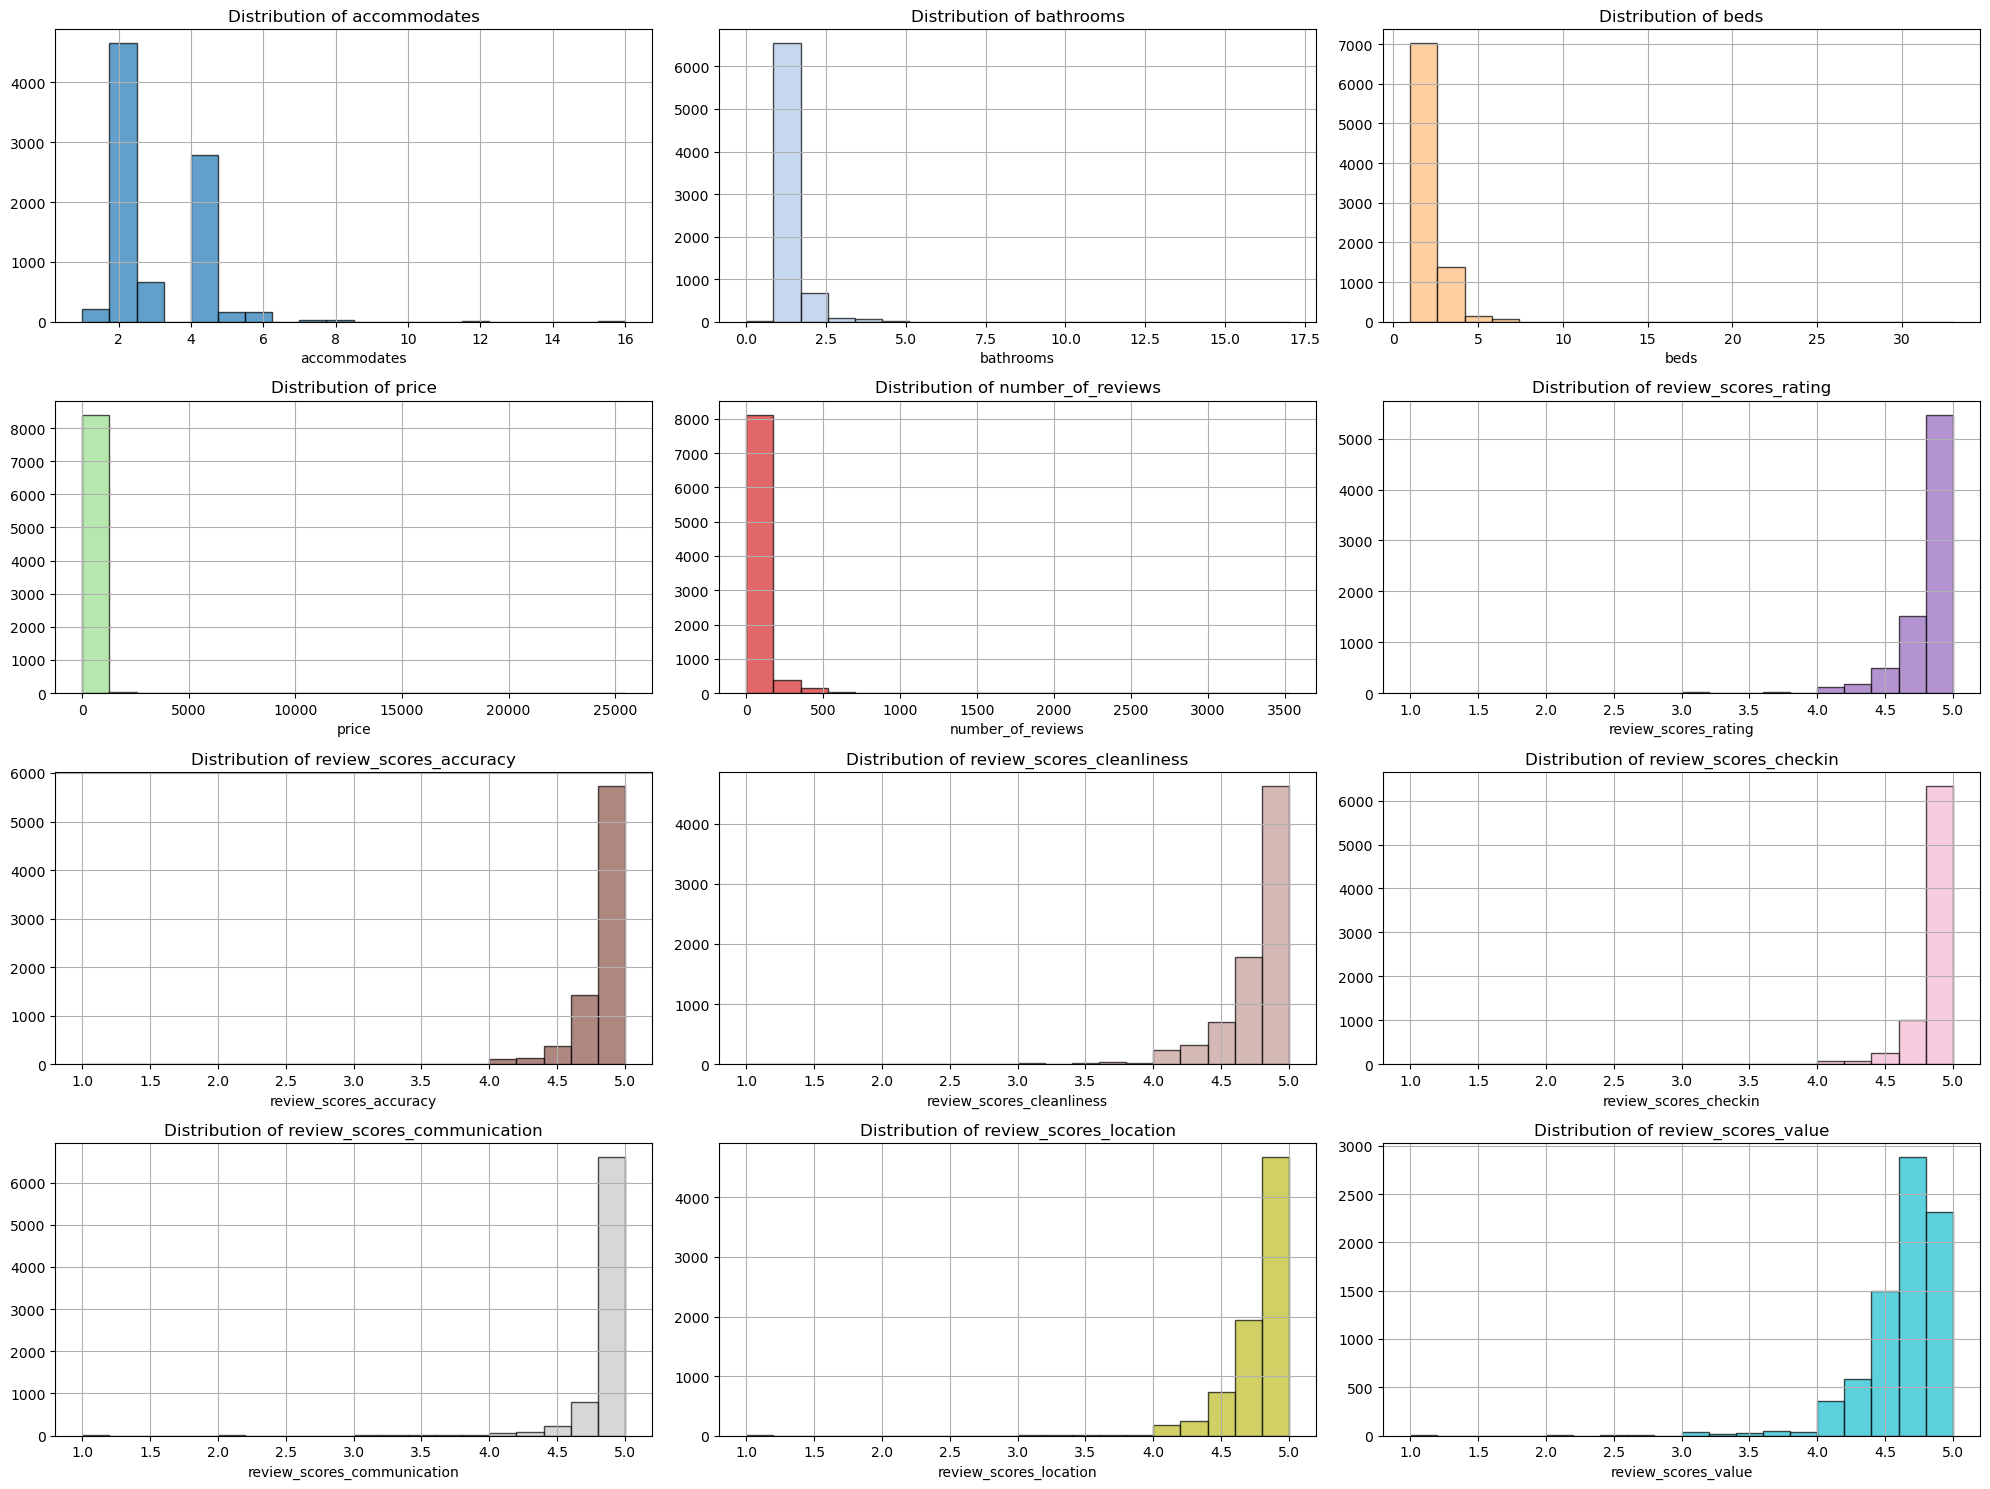

In [11]:
# Plotting the distribution of all numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

cmap = plt.colormaps.get_cmap('tab20')
colors = [cmap(i / len(numerical_columns)) for i in range(len(numerical_columns))]

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    axes[i].hist(data[col], bins=20, edgecolor='k', alpha=0.7,color=colors[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].grid(True)

plt.tight_layout()
plt.show()

**Accommodates:** Most properties can accommodate 2-4 people, with fewer properties available for more people.

**Bathrooms:** Most properties have 1 or 2 bathrooms, with more bathrooms being rare.

**Beds:** Most properties have 1-3 beds. Properties with more beds are less common.

**Price:** Prices vary widely, but most properties cost under 5000 units. Very high prices are rare.

**Number of Reviews:** Most properties have very few reviews. Properties with more than 50 reviews are rare.

**Review Scores Rating:** Most properties have an overall rating between 4.5 and 5, showing high satisfaction.

**Review Scores Accuracy:** Most properties have accuracy scores between 4.5 and 5, meaning the descriptions are accurate.

**Review Scores Cleanliness:** Most properties have cleanliness scores between 4.5 and 5.

**Review Scores Check-in:** Most properties have high check-in scores, between 4.5 and 5.

**Review Scores Communication:** Host communication scores are generally high, between 4.5 and 5.

**Review Scores Location:** Most properties have high location scores, between 4.5 and 5.

**Review Scores Value:** Most properties are seen as good value for money, with scores between 4.5 and 5.

In summary, these graphs show that most properties receive high scores in various categories and are priced within a certain range. This suggests that hosts usually provide good service, and guests are generally happy with their stays.

### Distribution of Categorical Variables

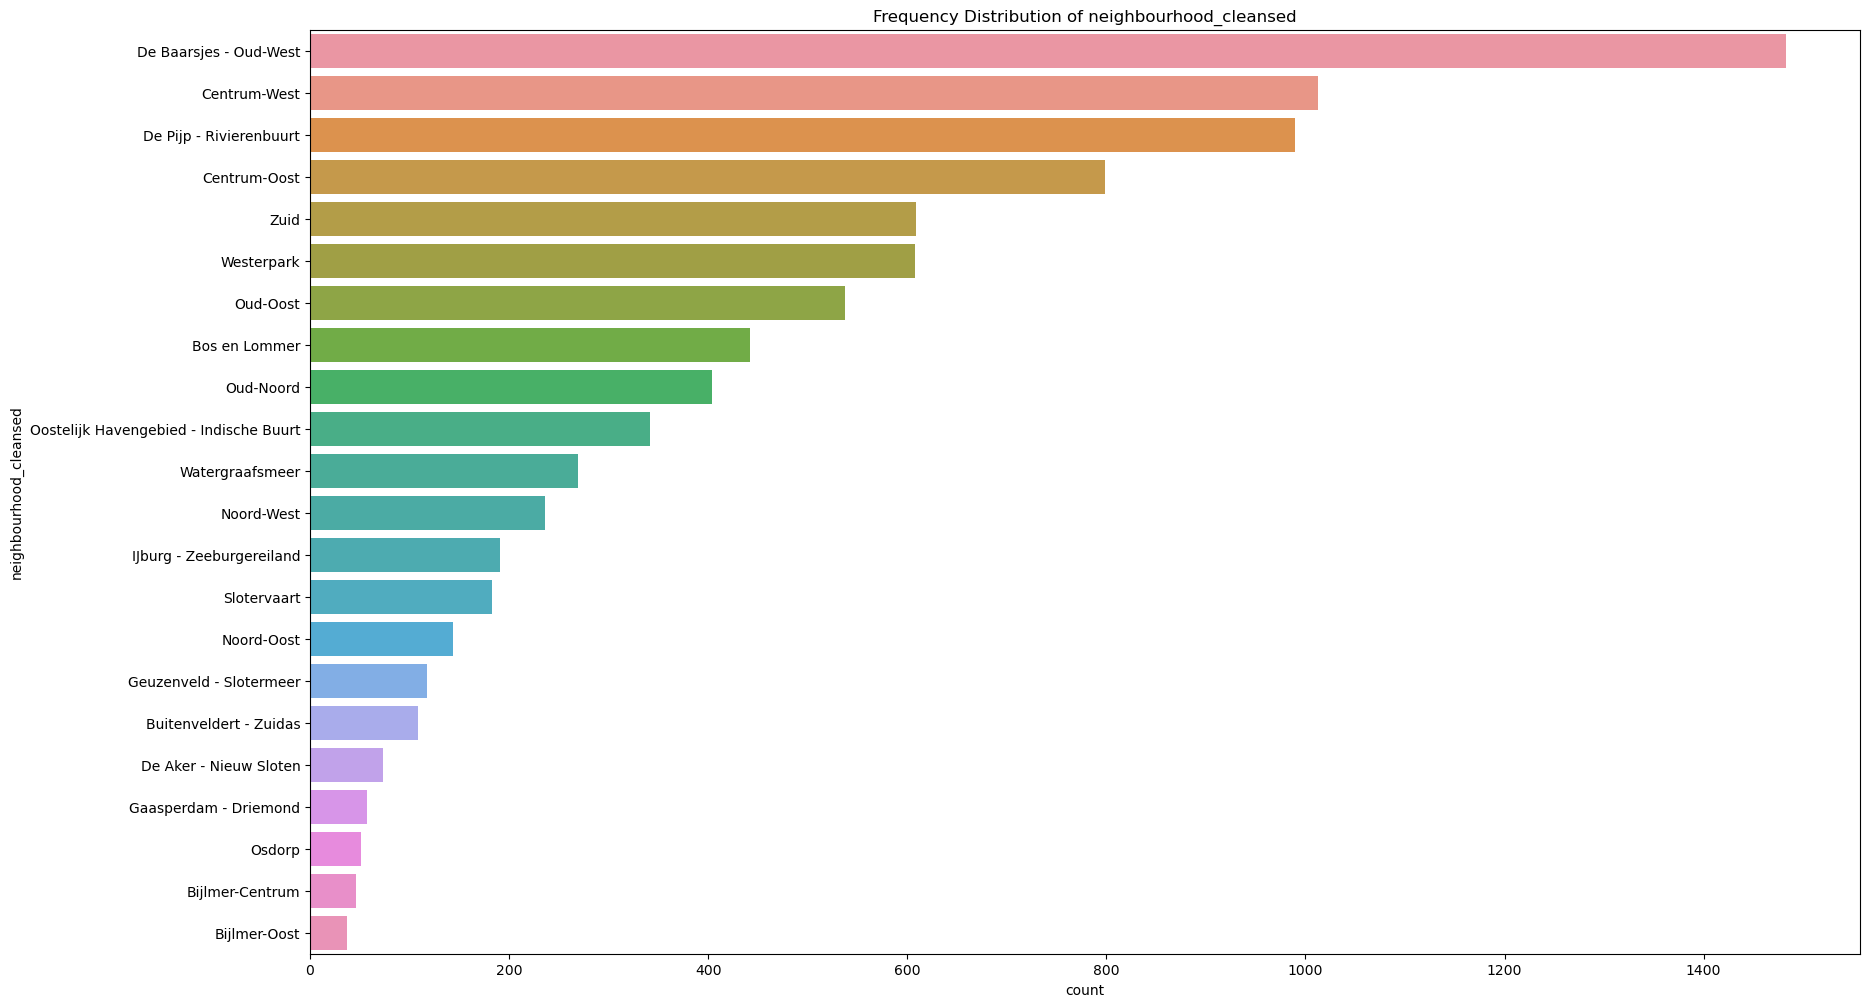

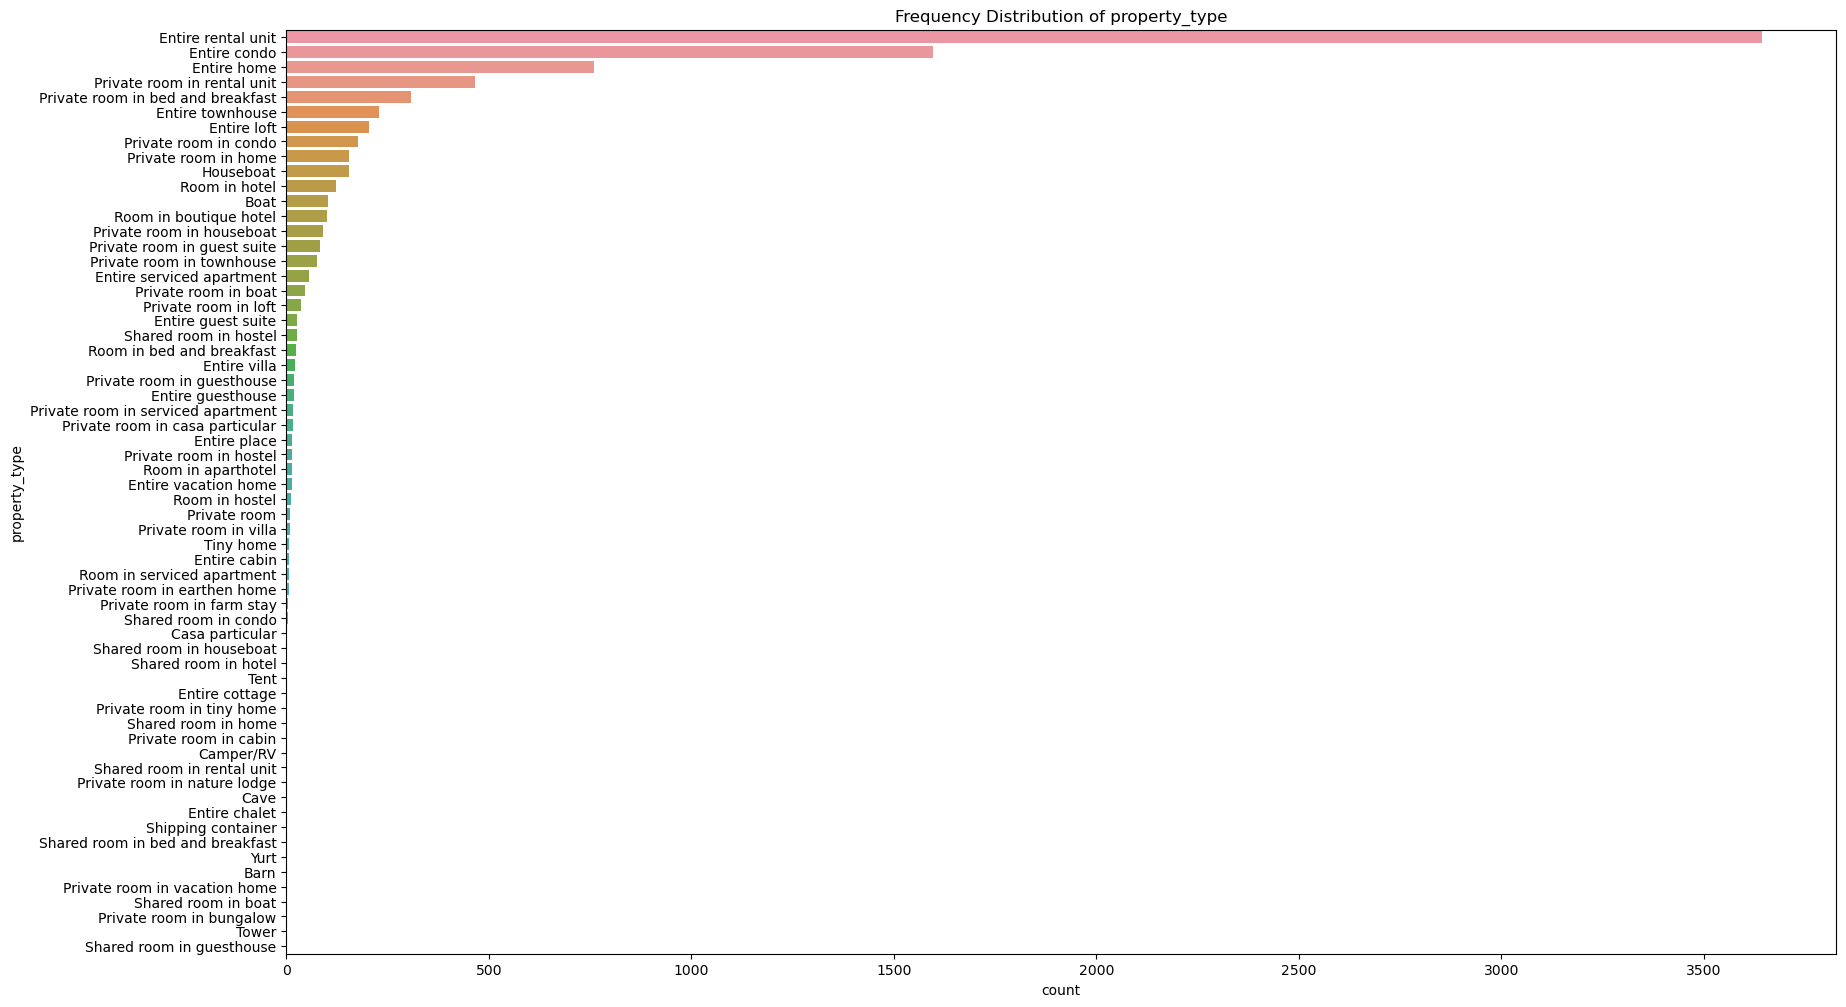

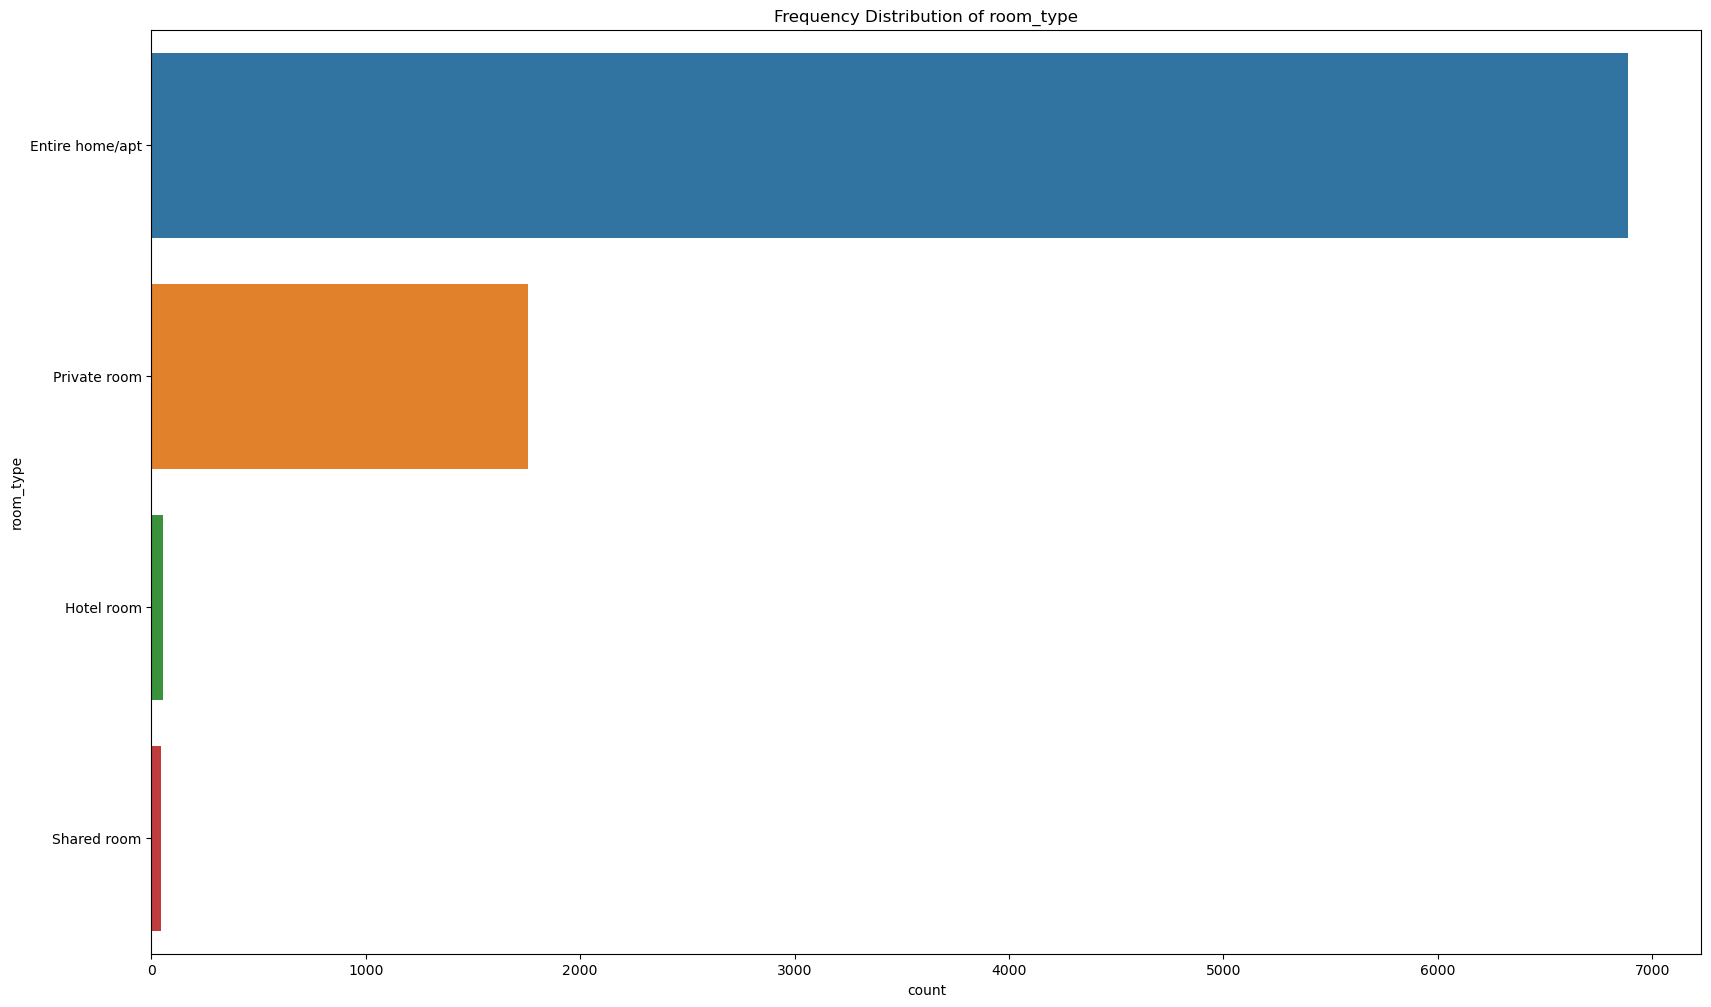

In [12]:
# Plotting the frequency distribution of all categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

for col in categorical_columns:
    plt.figure(figsize=(20, 12))
    sns.countplot(y=col, data=data, order=data[col].value_counts().index)
    plt.title(f'Frequency Distribution of {col}')
    plt.show()

_**First Graph**_

**Top Neighborhoods:** The neighborhoods with the most listings are "De Baarsjes - Oud-West," "Centrum-West," and "De Pijp - Rivierenbuurt." These areas have the highest number of properties available.

**Middle Range Neighborhoods:** Neighborhoods like "Zuid," "Westerpark," and "Oud-Oost" also have a significant number of listings, but not as many as the top three.

**Lower Range Neighborhoods:** Areas like "Gaasperdam - Driemond," "Osdorp," "Bijlmer-Centrum," and "Bijlmer-Oost" have the fewest listings.

This graph helps us understand which neighborhoods are more popular or have more properties available for rent. The more listings a neighborhood has, the higher it is on the graph.

_**Second Graph**_

**Most Common Property Types:** The most frequent property types are "Entire rental unit," "Entire condo," "Entire home," and "Private room in rental unit." These property types have the highest number of listings.

**Moderately Common Property Types:** Property types like "Private room in bed and breakfast," "Entire townhouse," "Entire loft," and "Private room in condo" have a significant number of listings but are less common than the top categories.

**Less Common Property Types:** Property types such as "Houseboat," "Boat," "Room in boutique hotel," and "Private room in guesthouse" have fewer listings.

**Rare Property Types:** Some property types are very rare, with only one or a few listings. These include "Entire villa," "Private room in villa," "Tiny home," "Private room in serviced apartment," and "Tent."

In summary, this graph helps us understand which types of properties are more widely available for rent. The most common types, like entire rental units and condos, are at the top, while unique or niche property types, such as houseboats and boutique hotel rooms, are much less common.

_**Third Graph**_

**Entire Home/Apt:** This is the most common room type, with the highest number of listings. It indicates that many properties available for rent are entire homes or apartments.

**Private Room:** The second most common room type. This means there are many listings where guests can rent a private room within a home or apartment.

**Hotel Room:** This room type has fewer listings compared to entire homes or private rooms. It indicates that there are some hotel rooms available for rent, but they are not as common.

**Shared Room:** This is the least common room type, with very few listings. It means there are only a small number of properties where guests can rent a shared room.

In summary, most properties available for rent are entire homes or apartments, followed by private rooms. Hotel rooms and shared rooms are much less common. This suggests that guests have more options to rent entire properties or private spaces rather than shared or hotel rooms.

### Correlation Matrix

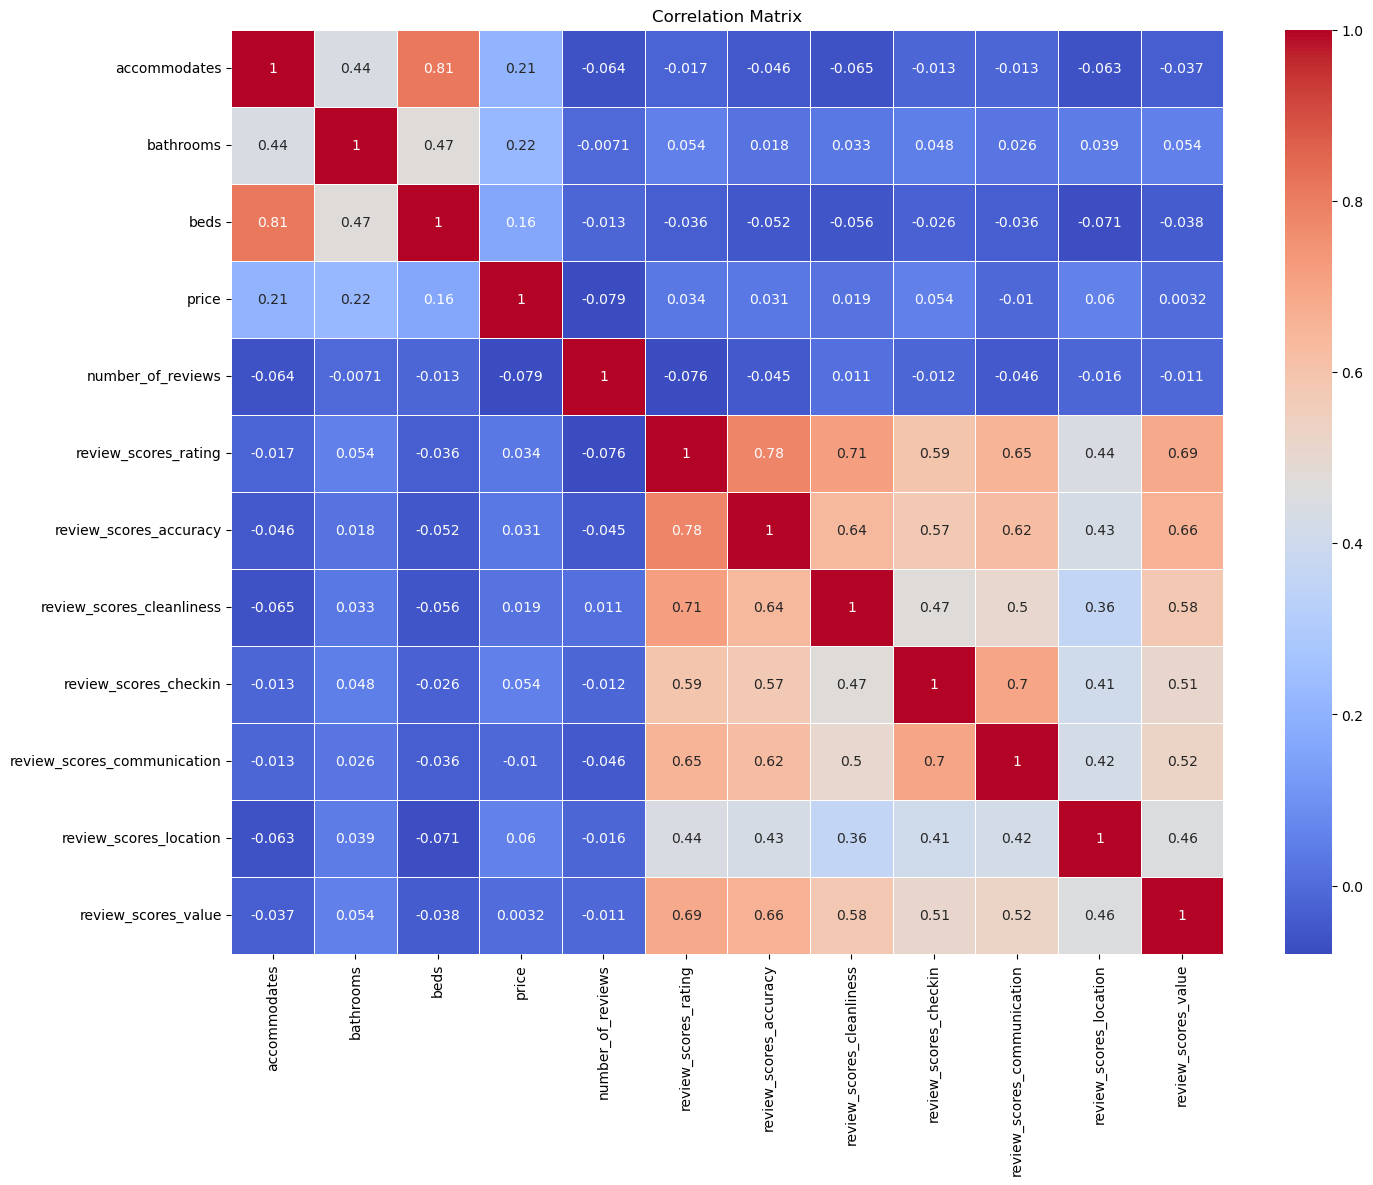

In [13]:
# Calculating and visualize the correlation matrix
correlation_matrix = data[numerical_columns].corr()
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

**Accommodates, Bathrooms, and Beds:**

Accommodates vs. Beds: Strong positive correlation (0.81). More beds generally mean more people can be accommodated.

Accommodates vs. Bathrooms: Moderate positive correlation (0.44). More bathrooms often mean the property can accommodate more people.

**Price:**

Price vs. Accommodates: Weak positive correlation (0.21). Higher prices slightly tend to accommodate more people.

Price vs. Bathrooms and Beds: Weak positive correlations (0.22 and 0.16). More bathrooms and beds slightly tend to increase the price.

**Review Scores:**

Review Scores are positively correlated with each other: For example, review scores rating has a strong positive correlation with review scores accuracy (0.78) and cleanliness (0.71). This means properties with high ratings tend to also score high in accuracy and cleanliness.

Review Scores vs. Number of Reviews: There is a very weak negative correlation (-0.076), suggesting that the number of reviews doesn’t significantly affect the review scores.

**Other Correlations:**

Review Scores Location vs. Review Scores Value: Moderate positive correlation (0.46). Good location often correlates with perceived good value.

Review Scores Communication vs. Review Scores Check-in: Strong positive correlation (0.70). Good communication typically accompanies good check-in experiences.

In summary, this matrix helps us understand how features like the number of beds, bathrooms, and review scores relate to each other and to the price. Strong correlations can guide us in predicting one feature based on another, while weak correlations indicate little to no direct relationship

# Feature Engineering

### Missing Values

In [14]:
# Checking for missing values
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100

# Creating a DataFrame to display the results
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

missing_data

,Missing Values,Percentage
neighbourhood_cleansed,0,0.000000
property_type,0,0.000000
room_type,0,0.000000
accommodates,0,0.000000
bathrooms,1329,15.207690
beds,74,0.846779
price,296,3.387115
number_of_reviews,0,0.000000
review_scores_rating,914,10.458863
review_scores_accuracy,914,10.458863


In [15]:
# Filling missing values with the median value
cols_to_fill = ["bathrooms", "review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location", "review_scores_value"]
for col in cols_to_fill:
    data[col].fillna(data[col].median(), inplace=True)

In [16]:
# Dropping missing data
data.dropna(inplace=True)

In [17]:
# Verifying the changes
print("Missing values after filling and dropping:")
data.isnull().sum()

Missing values after filling and dropping:


neighbourhood_cleansed         0
property_type                  0
room_type                      0
accommodates                   0
bathrooms                      0
beds                           0
price                          0
number_of_reviews              0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
dtype: int64

### Outlier Detection

In [18]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
accommodates,8371.0,2.916020,1.352106,1.0,2.00,2.00,4.00,16.0
bathrooms,8371.0,1.275116,0.501063,0.0,1.00,1.00,1.50,17.0
beds,8371.0,1.823319,1.442804,1.0,1.00,1.00,2.00,33.0
price,8371.0,251.578664,422.775122,10.0,144.00,200.00,298.00,25457.0
number_of_reviews,8371.0,46.274161,112.090135,0.0,3.00,10.00,36.00,3528.0
review_scores_rating,8371.0,4.845283,0.234994,1.0,4.80,4.91,5.00,5.0
review_scores_accuracy,8371.0,4.859016,0.230926,1.0,4.81,4.92,5.00,5.0
review_scores_cleanliness,8371.0,4.782064,0.303560,1.0,4.70,4.87,5.00,5.0
review_scores_checkin,8371.0,4.892880,0.215861,1.0,4.87,4.96,5.00,5.0
review_scores_communication,8371.0,4.912625,0.207951,1.0,4.90,5.00,5.00,5.0


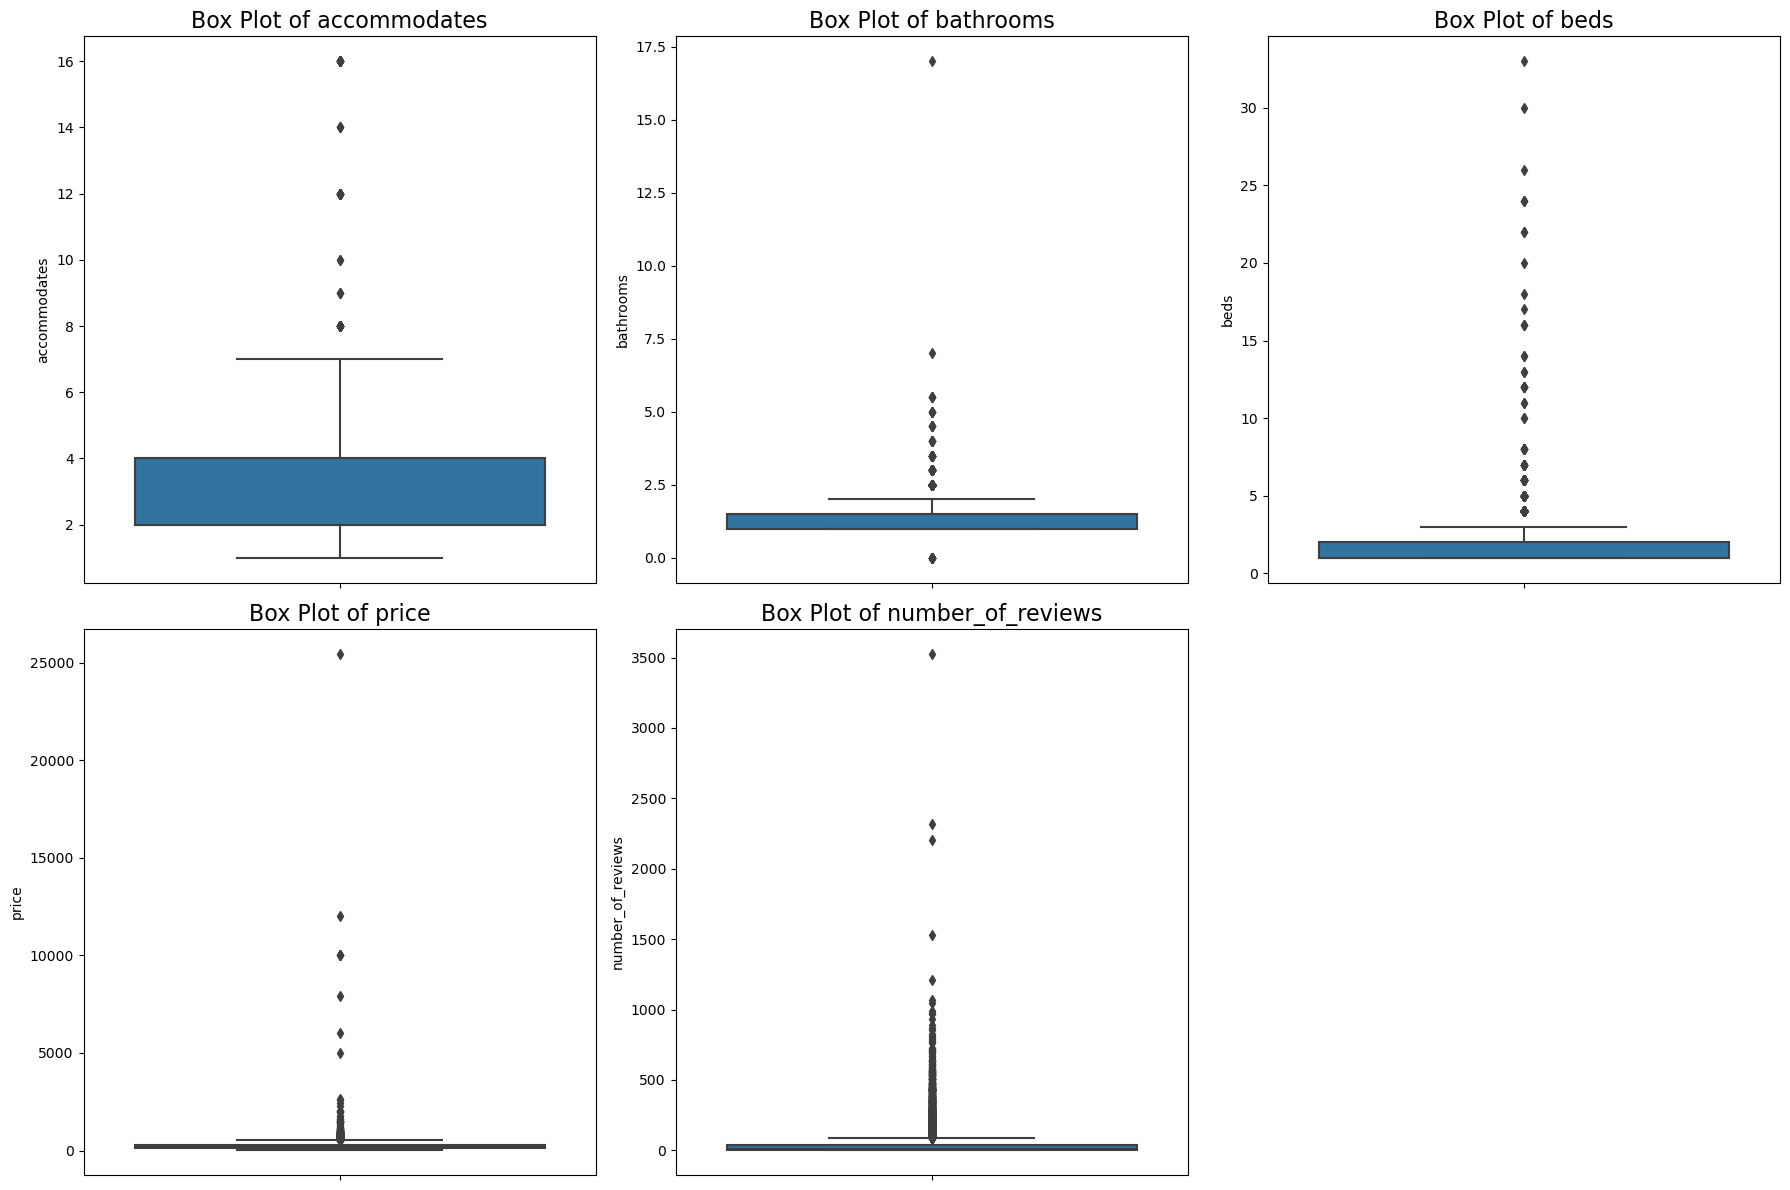

In [19]:
# List of numerical columns to plot
num_columns = ['accommodates', 'bathrooms', 'beds', 'price', 'number_of_reviews']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12)) 

for i, column in enumerate(num_columns):
    row = i // 3
    col = i % 3
    sns.boxplot(y=data[column], ax=axes[row, col])
    axes[row, col].set_title(f'Box Plot of {column}', fontsize=16)

fig.delaxes(axes[1, 2])

plt.tight_layout()
plt.show()

**Box Plot of Accommodates:**

This plot shows how many people each property can host.
Most properties can host between 2 and 4 people.
The middle line in the box shows that half the properties can host 3 or fewer people.
Some properties can host many more people, which are shown as dots above the box.

**Box Plot of Bathrooms:**

This plot shows how many bathrooms each property has.
Most properties have 1 or 2 bathrooms.
The middle line shows that half the properties have 1 or fewer bathrooms.
Some properties have a lot of bathrooms, which are shown as dots above the box.

**Box Plot of Beds:**

This plot shows how many beds each property has.
Most properties have 1 to 3 beds.
The middle line shows that half the properties have 2 or fewer beds.
Some properties have many beds, shown as dots above the box.

**Box Plot of Price:**

This plot shows the price of each property.
Most properties are priced below 5000 units.
The middle line shows that half the properties are priced very low compared to some very expensive ones.
Some properties are very expensive, shown as dots above the box.

**Box Plot of Number of Reviews:**

This plot shows how many reviews each property has received.
Most properties have fewer than 100 reviews.
The middle line shows that half the properties have very few reviews.
Some properties have many reviews, shown as dots above the box.

**What to Understand:**

These box plots help us see how features like the number of people a property can host, the number of bathrooms and beds, the price, and the number of reviews are spread out. The dots above the boxes show properties that are very different from most others. We need to delete some outlier values for better predictions. 

In [20]:
# Function to remove outliers based on IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.05)
    Q3 = df[column].quantile(0.95)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Applying the function to each numerical column
for column in num_columns:
    data = remove_outliers(data, column)

In [21]:
data[num_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
accommodates,8222.0,2.845901,1.102118,1.0,2.0,2.0,4.0,7.0
bathrooms,8222.0,1.257115,0.421702,0.0,1.0,1.0,1.5,3.5
beds,8222.0,1.749088,1.051257,1.0,1.0,1.0,2.0,8.0
price,8222.0,233.317441,134.874129,10.0,144.0,200.0,294.0,1120.0
number_of_reviews,8222.0,41.965823,85.419388,0.0,3.0,10.0,35.0,616.0


### New Features

In [22]:
# Merging scores
review_scores_columns = [col for col in data.columns if col.startswith('review_scores')]
data['review_scores_average'] = data[review_scores_columns].mean(axis=1)

In [23]:
# Dropping old scores
scores_cols = ["review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location", "review_scores_value"]
data.drop(scores_cols, inplace=True, axis=1)

In [24]:
# Number of people per room
data['room_density'] = data['accommodates'] / data['beds']

# Number of beds per person
data['room_density'] = data['beds'] / data['accommodates']

# Number of bathrooms per person
data['bathroom_density'] = data['bathrooms'] / data['accommodates']

# Handling division by zero and infinity values
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.fillna(0, inplace=True)

### Preparing Data for Model

In [25]:
# Scaling numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

In [26]:
# One hot encoding for categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True, dtype=int)

Different features in your data might have different units and scales. For example, one feature could be "price" measured in dollars (which could range from 0 to thousands), while another could be "number of reviews" (which could range from 0 to hundreds).
If these features are not scaled, some algorithms might treat features with larger scales as more important, simply because they have larger values.

# Model

In [27]:
X = data.drop('price', axis=1)
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Initializing the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Training the model
rf_model.fit(X_train, y_train)

# Predicting on test data
y_pred = rf_model.predict(X_test)

# Evaluating the model using RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 0.7728552131909098


The Root Mean Squared Error (RMSE) is a measure used to evaluate the accuracy of a model's predictions. It gives us an idea of how close the predicted values are to the actual values.

### Hyperparameter Optimization 

In [29]:
# Initializing the model
rf_model = RandomForestRegressor(random_state=42)

# Defining the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Performing GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(X, y)

# Extracting the best model
best_rf_model = grid_search.best_estimator_

# Predicting on the test data
y_pred = best_rf_model.predict(X_test)

# Evaluating the model using RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 0.6194556162451523


Optimizing hyperparameters can significantly improve the model's performance, making its predictions more accurate.

### Feature Importance

In [30]:
# Defining a custom function to plot feature importances
def plot_feature_importances(model, feature_names, threshold=None):
    feature_importances = pd.Series(model.feature_importances_, index=feature_names)
    filtered_importances = feature_importances[feature_importances >= threshold]
    filtered_importances.sort_values(ascending=False).plot(kind='barh')
    plt.xlabel('Score')
    plt.title(f'Feature Importance (Score >= {threshold})')
    plt.show()
    return filtered_importances

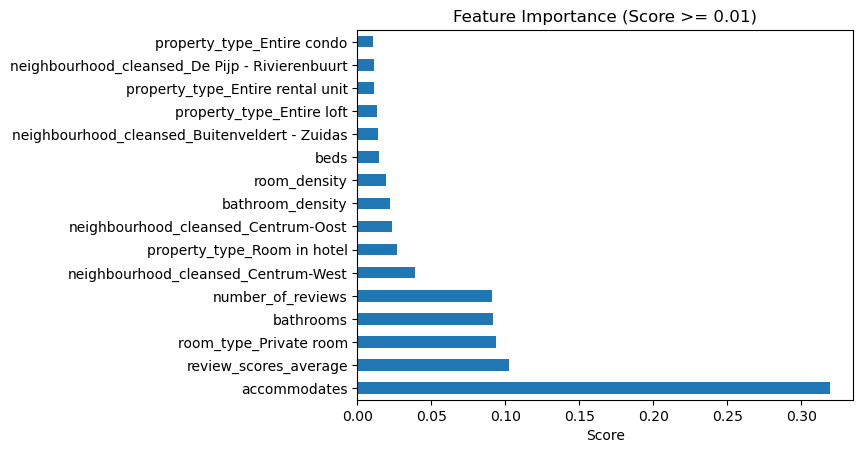

In [31]:
filtered_importances = plot_feature_importances(best_rf_model, X_train.columns, threshold=0.01)

**Top Features:**

Accommodates: This feature has the highest importance score, indicating that the number of people a property can accommodate is the most crucial factor in predicting its price.

Review Scores Average: This is also a significant feature, meaning that the average review score of a property greatly affects its price.

Bathrooms: The number of bathrooms is another important feature, affecting the price considerably.

Number of Reviews: The total number of reviews a property has is also influential in determining the price.

Private Room: Whether the property is a private room affects the price.

**Less Important Features:**

Features like property type (e.g., entire condo, entire rental unit), neighborhood (e.g., De Pijp - Rivierenbuurt, Centrum-West), and others have lower importance scores, indicating they have less influence on the price.